In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Observation 1: The bubble chart is a really nice demonstration of the rideshare pricing model- more rides means more demand for drivers, but more drivers mean that prices are driven down. This leads to urban areas with constant rides, but each is pretty cheap as there are tons of drivers, vs rural areas where one guy drives one other guy around, but he gets paid a ton.")
print("\nObservation 2: You'd expect another couple rural drivers. They're pulling in 6% of revenue as only 3% of drivers- that suggests they're making an average of 2x their urban counterparts. However, this may not account for part-time drivers who pick up just a few rides a week and may throw off the numbers.")
print("\nObservation 3: It's interesting that urban drivers really aren't making much. Number of drivers varies, but there's a pretty hard cap on how high the fare gets- a wide horizontal variance, but relatively little veritcal spread. Makes me wonder- if you grab a Pyber from downtown and take it home to the suburbs, does it catagorize it by end point? Could skew data.")

Observation 1: The bubble chart is a really nice demonstration of the rideshare pricing model- more rides means more demand for drivers, but more drivers mean that prices are driven down. This leads to urban areas with constant rides, but each is pretty cheap as there are tons of drivers, vs rural areas where one guy drives one other guy around, but he gets paid a ton.

Observation 2: You'd expect another couple rural drivers. They're pulling in 6% of revenue as only 3% of drivers- that suggests they're making an average of 2x their urban counterparts. However, this may not account for part-time drivers who pick up just a few rides a week and may throw off the numbers.

Observation 3: It's interesting that urban drivers really aren't making much. Number of drivers varies, but there's a pretty hard cap on how high the fare gets- a wide horizontal variance, but relatively little veritcal spread. Makes me wonder- if you grab a Pyber from downtown and take it home to the suburbs, does it c

In [167]:
file_location = "../../Resources/Pyber/ride_data.csv"
ride_data = pd.read_csv(file_location)

file_location2 = "../../Resources/Pyber/city_data.csv"
city_data = pd.read_csv(file_location2)
#ride_data.head()
#ride_data["city"].nunique()

In [168]:
#city_data.head()
#city_data["city"].count_values

In [169]:
#We need to group the ride data by city
#it should read city - average fare... that's it?
#merge the two lists
#rock on
try:
    ride_data = ride_data.groupby("city")
except AttributeError:
    print("Already grouped")
ride_series = ride_data["fare"].mean()
ride_count = ride_data["ride_id"].count()
#I think we need the data to be a df to merge it, so let's convert:
ride_df = ride_series.to_frame()
ride_df2 = ride_count.to_frame()
ride_df=ride_df.reset_index()
ride_df2 = ride_df2.reset_index()
ride_df = pd.merge(ride_df, ride_df2, on="city", how="left")
#ride_df.head()

In [170]:
merge_ride_df = pd.merge(city_data, ride_df, on="city", how="left")
#merge_ride_df.head()

In [171]:
merge_ride_df = merge_ride_df.rename(columns = {"city": "City", "ride_id":"Ride Count","driver_count": "Driver Count", "type": "City Type", "fare": "Average Fare"})
#merge_ride_df.head()

C:\Users\thoma\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


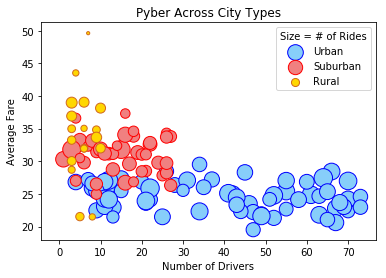

In [172]:
urban_data = merge_ride_df.loc[merge_ride_df["City Type"] == "Urban"]
suburban_data = merge_ride_df.loc[merge_ride_df["City Type"] == "Suburban"]
rural_data = merge_ride_df.loc[merge_ride_df["City Type"] == "Rural"]

x_axis_urban = merge_ride_df["Driver Count"]
y_axis_urban = merge_ride_df["Average Fare"]
bub_size_urban = merge_ride_df["Ride Count"]


#merge_ride_df.plot.scatter(x="Driver Count", y="Average Fare", c="City Type", s=bub_size*10)
fig = plt.figure()
ax1 = fig.add_subplot(111)

#axis 1 is urban, 2 is suburban, 3 is rural.
#Yes, we could probably iterate through this, but for 3 let's just type it out.
ax1.scatter(x=urban_data["Driver Count"], y = urban_data["Average Fare"], c= "lightskyblue", edgecolors = "blue", s = urban_data["Ride Count"]*10, label = "Urban")
ax1.scatter(x=suburban_data["Driver Count"], y = suburban_data["Average Fare"], c= "lightcoral", edgecolors = "red", s = suburban_data["Ride Count"]*10, label = "Suburban")
ax1.scatter(x=rural_data["Driver Count"], y = rural_data["Average Fare"], c= "gold", edgecolors = "chocolate", s = rural_data["Ride Count"]*10, label = "Rural")
ax1.set_xlabel("Number of Drivers")
ax1.set_ylabel("Average Fare")

plt.legend(loc='upper right', title = "Size = # of Rides")
plt.title("Pyber Across City Types")
fig.show()

In [173]:
'''* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type'''
#This cell sets up our pie charts

rural_data["Total Fare"] = rural_data["Average Fare"]*rural_data["Ride Count"]
#rural_data.head()
total_rural_fares = rural_data["Total Fare"].sum()
total_rural_rides = rural_data["Ride Count"].sum()
total_rural_drivers = rural_data["Driver Count"].sum()

#repeat for other city types
urban_data["Total Fare"] = urban_data["Average Fare"]*urban_data["Ride Count"]
#urban_data.head()
total_urban_fares = urban_data["Total Fare"].sum()
total_urban_rides = urban_data["Ride Count"].sum()
total_urban_drivers = urban_data["Driver Count"].sum()

suburban_data["Total Fare"] = suburban_data["Average Fare"]*suburban_data["Ride Count"]
#suburban_data.head()
total_suburban_fares = suburban_data["Total Fare"].sum()
total_suburban_rides = suburban_data["Ride Count"].sum()
total_suburban_drivers= suburban_data["Driver Count"].sum()



C:\Users\thoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\thoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\thoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

([<matplotlib.patches.Wedge at 0x262d5568438>,
 [Text(-0.348051,-1.04348,'Urban'),
  Text(0.554808,0.949836,'Suburban'),
  Text(-0.679591,0.86496,'Rural')],
 [Text(-0.189846,-0.569173,'62.0%'),
  Text(0.302623,0.518092,'31.4%'),
  Text(-0.370686,0.471797,'6.6%')])

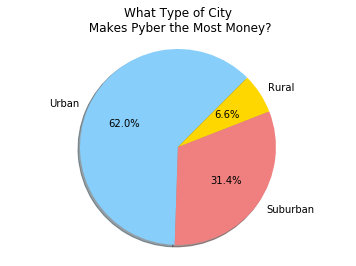

In [174]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [total_urban_fare, total_suburban_fares, total_rural_fare]

# The colors of each section of the pie chart
colors = ["lightskyblue", "lightcoral", "gold"]

#edgecolors = ["blue", "red", "chocolate"] - would've looked nice with borders, but pie charts dont have them.

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
fares_pie = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=45)
plt.axis("equal")
plt.title("What Type of City\n Makes Pyber the Most Money?")
fare_pie

([<matplotlib.patches.Wedge at 0x262d5b59278>,
 [Text(-1.0697,0.256406,'Urban'),
  Text(1.01385,-0.426748,'Suburban'),
  Text(0.893826,0.641151,'Rural')],
 [Text(-0.583472,0.139858,'67.5%'),
  Text(0.553008,-0.232772,'27.3%'),
  Text(0.487542,0.349719,'5.2%')])

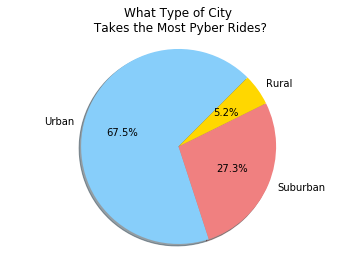

In [175]:
# Labels for the sections of our pie chart
labels2 = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes2 = [total_urban_rides, total_suburban_rides, total_rural_rides]

# The colors of each section of the pie chart
colors2 = ["lightskyblue", "lightcoral", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode2 = (0, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
rides_pie = plt.pie(sizes2, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=45)
plt.axis("equal")
plt.title("What Type of City\n Takes the Most Pyber Rides?")
rides_pie

([<matplotlib.patches.Wedge at 0x262d5568438>,
 [Text(-0.348051,-1.04348,'Urban'),
  Text(0.554808,0.949836,'Suburban'),
  Text(-0.679591,0.86496,'Rural')],
 [Text(-0.189846,-0.569173,'62.0%'),
  Text(0.302623,0.518092,'31.4%'),
  Text(-0.370686,0.471797,'6.6%')])

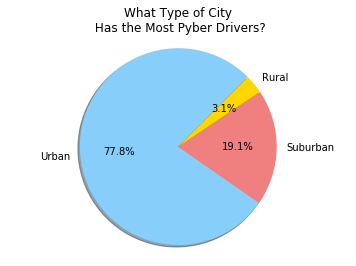

In [176]:
# The values of each section of the pie chart
sizes3 = [total_urban_drivers, total_suburban_drivers, total_rural_drivers]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
driver_pie = plt.pie(sizes3, explode=explode3, labels=labels3, colors=colors3, autopct="%1.1f%%", shadow=True, startangle=45)
plt.axis("equal")
plt.title("What Type of City\n Has the Most Pyber Drivers?")
fare_pie